# Explore your Data: Exploratory Data Analysis
Reference Medium article (here)[https://medium.com/data-science-everywhere/explore-your-data-exploratory-data-analysis-8b54dfdfb898].

This uses the India Air Quality dataset found (here)[https://www.kaggle.com/shrutibhargava94/india-air-quality-data].

Interesting points from the article:
* Exploratory Data Analysis is an approach analyzing data sets to summarize their main characteristics such as mean, standard deviation, and count, so on, often with visual methods.
* The amount of data we produce every day is truly mind-boggling. There are 2.5 quintillion bytes of data created each day at our current pace.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# filter warnings that can be ignored
import warnings
warnings.filterwarnings('ignore')

Wherever you get the dataset, you first need to analyze the structure, domain, and contents of it thoroughly.

## Dataset: Basic Info

India Air Quality dataset is released by the Ministry of Environment and Forests and Central Pollution Control Board of India under the National Data Sharing and Accessibility Policy (NDSAP).  Using this, one can explore India’s air pollution levels at a more granular scale.

**Column Descriptions**:
* stn_code: Station Code
* sampling_date: Date of sampling (note how this is formatted)
* state: State
* location: Location of recording
* agency: Agency
* type: Type of area
* so2: Sulphur dioxide (µg/m3)
* no2: Nitrogen dioxide (µg/m3)
* rspm: Respirable Suspended Particulate Matter (µg/m3)
* spm: Suspended Particulate Matter (µg/m3)
* location_monitoring_station: Location of data collection
* pm2_5: PSI 2.5 (µg/m3)
* date: Date of sampling

Specifically, SPM, RSPM, PM2.5 values are the parameters used to measure the quality of air based on the number of particles present in it.

### Initial level of investigation on dataset

In [35]:
data_df = pd.read_csv("data.csv", encoding='latin1')

In [36]:
data_df.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [37]:
data_df.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [38]:
data_df.shape

(435742, 13)

In [39]:
# Number of null values in each column
data_df.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [40]:
# range, column, number of non-null objects of each column, datatype and memoray usage
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [41]:
# The number of non-null values in each column
data_df.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

### Summarize Details:

Generate the descriptive statistics that sumarize the central tendency, dispersion and shape of a dataset's distribution, exluding NaN values.

In [42]:
data_df.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


## Cleansing the dataset
#### Dropping less valued columns
1. stn_code, agency, sampling_date, location_monitoring_agency do not add much value to the dataset in terms of information. Therefore, we can drop those columns.
2. Dropping rows where no date is available.

In [43]:
data_df.drop(['stn_code', 'agency', 'sampling_date', 'location_monitoring_station'], axis=1, inplace=True)
data_df = data_df.dropna(subset=['date'])
data_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,1990-03-01


### Changing the types to uniform format
When you see the dataset, you may notice that the ‘type’ column has values such as ‘Industrial Area’ and ‘Industrial Areas’ — both actually mean the same, so let’s remove such type of stuff and make it uniform.

In [44]:
data_df.type.unique()

array(['Residential, Rural and other Areas', 'Industrial Area', nan,
       'Sensitive Area', 'Industrial Areas', 'Residential and others',
       'Sensitive Areas', 'Industrial', 'Residential', 'RIRUO',
       'Sensitive'], dtype=object)

In [45]:
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan: "RRO"
}
data_df.type = data_df.type.replace(types)
data_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [46]:
data_df.type.unique()

array(['RRO', 'I', 'S', 'RO', 'R', 'RIRUO'], dtype=object)

### Creating a year column
To view the trend over a period of time, we need year values for each row and also when you see in most of the values in date column only has ‘year’ value. So, let’s create a new column holding year values.

In [50]:
data_df['date'] = pd.to_datetime(data_df['date'],errors='coerce')
data_df['year'] = data_df.date.dt.year
data_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


### Handling Missing Values
The column such as SO2, NO2, rspm, spm, pm2_5 are the ones which contribute much to our analysis. So, we need to remove null from those columns to avoid inaccuracy in the prediction. We use the Imputer from sklearn.preprocessing to fill the missing values in every column with the mean.

In [51]:
cols = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [57]:
from sklearn import impute
# invoking SimpleImputer to fill missing values
imputer = impute.SimpleImputer(missing_values = np.nan, strategy = 'mean')
data_df[cols] = imputer.fit_transform(data_df[cols])
data_df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,108.833091,220.78348,40.791467,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,108.833091,220.78348,40.791467,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,108.833091,220.78348,40.791467,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,108.833091,220.78348,40.791467,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,108.833091,220.78348,40.791467,1990-03-01,1990


In [58]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
state       435735 non-null object
location    435735 non-null object
type        435735 non-null object
so2         435735 non-null float64
no2         435735 non-null float64
rspm        435735 non-null float64
spm         435735 non-null float64
pm2_5       435735 non-null float64
date        435735 non-null datetime64[ns]
year        435735 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


In [60]:
# check for any null values
data_df.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64

## Statewise grouping of rspm, spm, no2 values
### so2 status

In [62]:
statewise_so2 = data_df[['so2','state']].groupby('state', as_index=False).median().sort_values(by='so2')
statewise_so2.head(10)

,state,so2
22,Nagaland,2.0
21,Mizoram,2.0
20,Meghalaya,2.0
1,Arunachal Pradesh,2.5
12,Himachal Pradesh,3.0
16,Kerala,4.2
29,Telangana,5.0
23,Odisha,5.0
13,Jammu & Kashmir,5.0
0,Andhra Pradesh,5.0


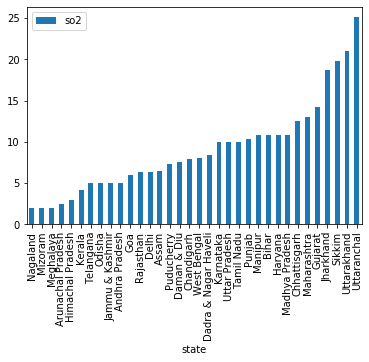

In [63]:
statewise_so2.plot(kind='bar', x='state', y='so2')

**Observation:** Plotting for SO2, we can see that the top state is Uttaranchal, while the bottom state is Meghalaya.

### no2 status

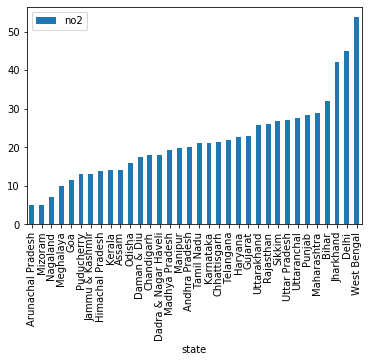

In [65]:
statewise_no2 = data_df[['no2','state']].groupby('state', as_index=False).median().sort_values(by='no2')
statewise_no2.plot(kind='bar', x='state', y='no2')

### rspm status

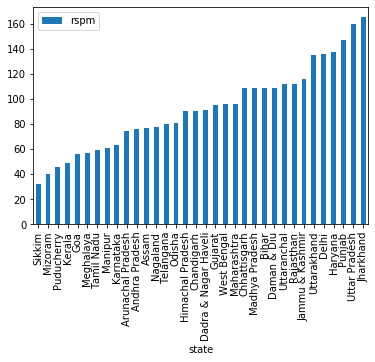

In [66]:
statewise_rspm = data_df[['rspm','state']].groupby('state', as_index=False).median().sort_values(by='rspm')
statewise_rspm.plot(kind='bar', x='state', y='rspm')

### spm status

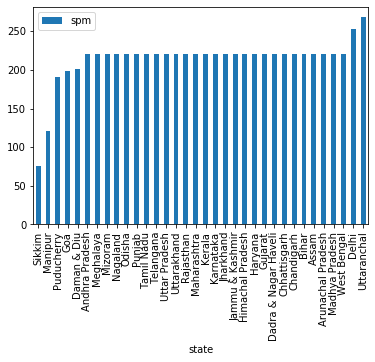

In [67]:
statewise_spm = data_df[['spm','state']].groupby('state', as_index=False).median().sort_values(by='spm')
statewise_spm.plot(kind='bar', x='state', y='spm')

## What is the yearly trend in a particular state, say 'Andhra Pradesh'?
We have created a new dataframe containing the NO2, SO2, rspm, and spm data regarding state ‘Andhra Pradesh’ only and group it by ‘year’.

In [68]:
andhra = data_df[data_df['state']=='Andhra Pradesh']
yearwise_AP = andhra[['so2','no2','rspm','spm','year']].groupby('year').median()
yearwise_AP.head()

,so2,no2,rspm,spm
year,,,,
1990,5.60,13.6,108.833091,179.00000
1991,8.25,12.8,108.833091,141.50000
1992,12.40,27.6,108.833091,192.00000
1993,6.00,11.4,108.833091,220.78348
1994,8.70,14.2,108.833091,220.78348


No handles with labels found to put in legend.


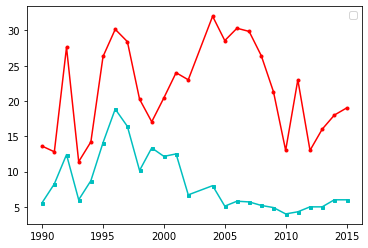

In [69]:
plt.plot(yearwise_AP['so2'],'-sc', markersize=3)
plt.plot(yearwise_AP['no2'],'-or', markersize=3)
plt.legend()

No handles with labels found to put in legend.


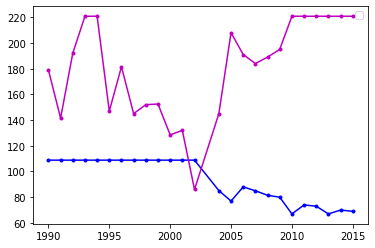

In [70]:
plt.plot(yearwise_AP['rspm'],'-ob', markersize=3)
plt.plot(yearwise_AP['spm'],'-om', markersize=3)
plt.legend()

This gave an alarming signal that the value spm in Andhra Pradesh is hiking. It’s 220 µg/m3 for the past 6 years (2010–2015).